# A minimal example with LinearDyBM

- Author: Takayuki Osogami
- Date: Jul. 12, 2017
- (C) Copyright IBM Corp. 2016

Here we provide an example of training a DyBM for predicting target sequence from input sequence.  The target pattern at time t is predicted based on the input patterns upto time t - 1.  The input sequence is a noisy sine wave, and the output sequence is another noisy sine wave, whose phase differs from the input sequence.

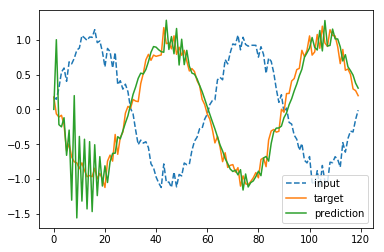

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pydybm.time_series.dybm import LinearDyBM
from pydybm.base.generator import NoisySin
import pydybm.arraymath as amath

# Prepare generators of time-series for input and target
# In this example, we generate noisy sine waves
length = 15000  # length of the time-series
period = 60  # period of the sine wave
std = 0.1  # standard deviation of the noise
input_dim = 1  # dimension of the input time-series
target_dim = 1  # dimension of the target time-series
input_generator = NoisySin(length,period,std,input_dim)
target_generator = NoisySin(length,period,std,target_dim,phase=amath.array([amath.pi]))

# Create a DyBM
# In this example, we use the simplest Linear DyBM
dybm = LinearDyBM(input_dim, target_dim)

# Learn and predict the time-series in an online manner
result = dybm.learn(input_generator, target_generator)

# Plot input, target, and prediction for the first two periods of learning
# Input data used for learning
input_data = input_generator.to_list()
plt.plot(input_data[:2*period], linestyle="--", label="input")
# Target data used for learning
# input_data[:t] (i.e., input_data[0], ..., input_data[t-1]) is used to predict target[t]
target_data = target_generator.to_list()
plt.plot(target_data[:2*period],label="target")
# Prediction
plt.plot(result["prediction"][:2*period],label="prediction")
plt.legend()

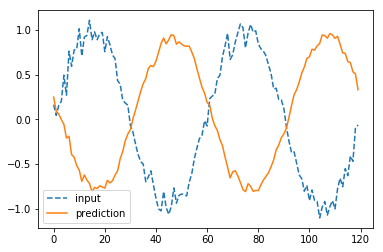

In [2]:
# Now we use the trained Linear DyBM for new input sequence

# Set seed of random number generator
seed = 1
test_input_generator = NoisySin(2*period,period,std,input_dim)
test_input_generator.reset(seed)

# Get predictions against test input data
prediction = dybm.get_predictions(test_input_generator)

# Plot
# Input data used for prediction
test_input_data = test_input_generator.to_list(seed)
plt.plot(test_input_data, linestyle="--", label="input")
# Prediction
plt.plot(prediction, label="prediction")
plt.legend()